# Denoising DCT

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import cv2
from skimage import img_as_float
from skimage.restoration import estimate_sigma
from skimage.io import imread
import numpy as np

In [2]:
im = img_as_float(imread('bird.png'))

In [3]:
sigma = 0.45
noisy = im + sigma * np.random.standard_normal(im.shape)
noisy = np.clip(noisy, 0 ,1)

sigma_est = np.mean(estimate_sigma(noisy,multichannel=True))
print("Estimated noise standard deviation = {}".format(sigma_est))

Estimated noise standard deviation = 0.25806451906789996


In [4]:
out=noisy.copy()
cv2.xphoto.dctDenoising(noisy, out, sigma_est)

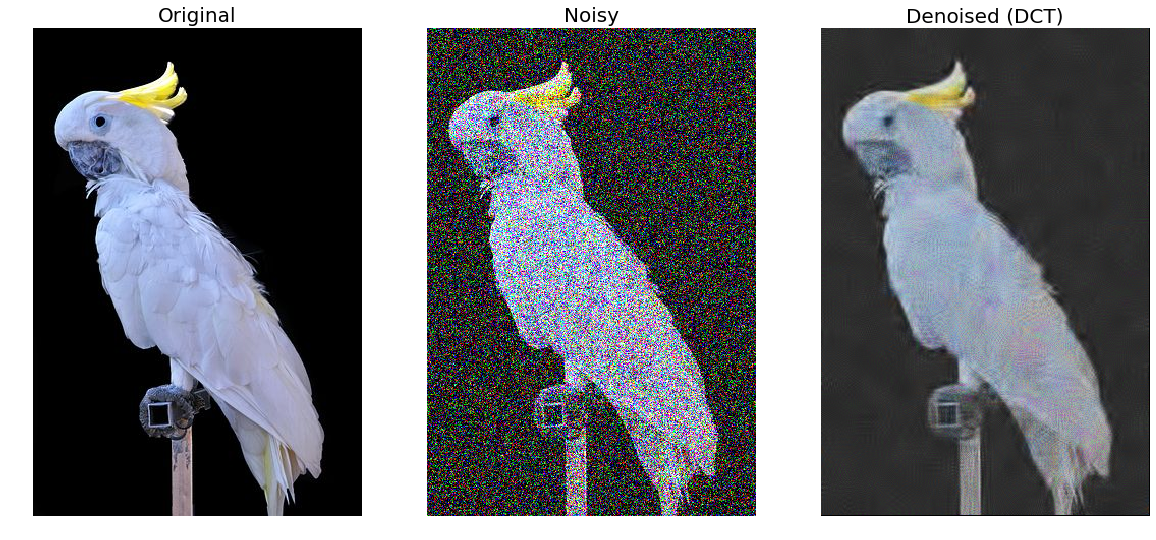

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(132), plt.imshow(noisy), plt.axis('off'), plt.title('Noisy', size=20)
plt.subplot(133), plt.imshow(out), plt.axis('off'), plt.title('Denoised (DCT)', size=20)
plt.show()